In [1]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 3  # Change this value as needed

In [3]:
cal = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/without scintillator.txt'

df_cal = pd.read_table(cal, decimal=',')

df_cal.columns = ['Threshold - No Scintillator', 'Frequency - No Scintillator', 'Threshold - With Scintillator', 'Frequency - With Scintillator']

# Processing for the radioactive samples

nAm1 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Am 1.txt'
nAm2 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Am 2.txt'
nAm3 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Am 3.txt'

nNa = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Calibration Data/Na thrershold calibration/blank cristal.txt'


nCs1 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Cs 1.txt'
nCs2 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Cs 2.txt'
nCs3 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Cs 3.txt'

df_nAm1 = pd.read_table(nAm1, decimal=',')
df_nAm2 = pd.read_table(nAm2, decimal=',')
df_nAm3 = pd.read_table(nAm3, decimal=',')

df_nNa = pd.read_table(nNa, decimal=',')


df_nCs1 = pd.read_table(nCs1, decimal=',')
df_nCs2 = pd.read_table(nCs2, decimal=',')
df_nCs3 = pd.read_table(nCs3, decimal=',')

df_nAm = [df_nAm1, df_nAm2, df_nAm3]
df_nCs = [df_nCs1, df_nCs2, df_nCs3]
df_Na = [df_nNa]

for i in df_nAm:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']

for i in df_Na:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']

for i in df_nCs:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']


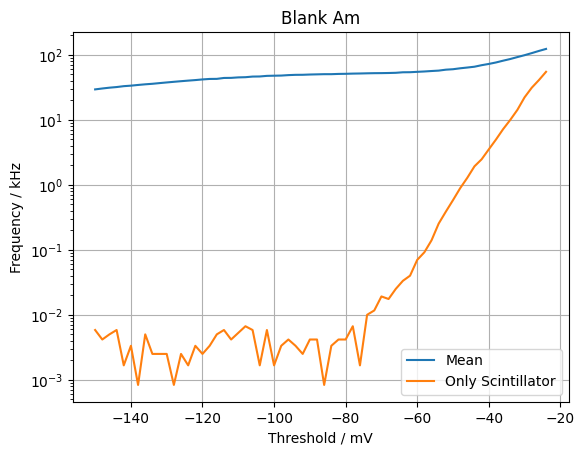

In [11]:
# Checking if all the trials are good and generating the mean result


mean_df_nAm = pd.concat(df_nAm).groupby(level=0).mean()

plt.semilogy(df_nAm[1]['Threshold'],df_nAm[1]['Frequency'], label=f'Mean')


plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.title('Blank Am')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')
plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/New_Graphs/Blank Am.png', dpi=300, bbox_inches='tight')

plt.show()


In [5]:
#Threshold -60
a = df_nAm[1]['Frequency'][18]
b = df_cal['Frequency - With Scintillator'][18]

print( f'SNR is {round(a/b, 0)}')


SNR is 784.0


In [6]:
df_nNa

,Threshold,Frequency
0,-24,0.356667
1,-26,0.320000
2,-28,0.280000
3,-30,0.306667
4,-32,0.216667
...,...,...
59,-142,0.216667
60,-144,0.213333
61,-146,0.206667
62,-148,0.233333


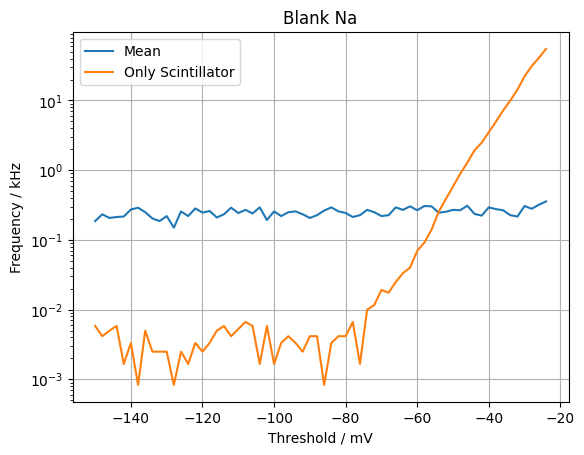

In [12]:
# Checking if all the trials are good and generating the mean result



plt.semilogy(df_nNa['Threshold'],df_nNa['Frequency'], label=f'Mean')


plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.title('Blank Na')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')
plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/New_Graphs/Blank Na.png', dpi=300, bbox_inches='tight')

plt.show()


In [8]:
#Threshold -80
c = df_nNa['Threshold'][28]
a = df_nNa['Frequency'][28]
b = df_cal['Frequency - With Scintillator'][28]
print(c, a , b , f'SNR is {round(a/b, 0)}')

-80 0.243333 0.00416667 SNR is 58.0


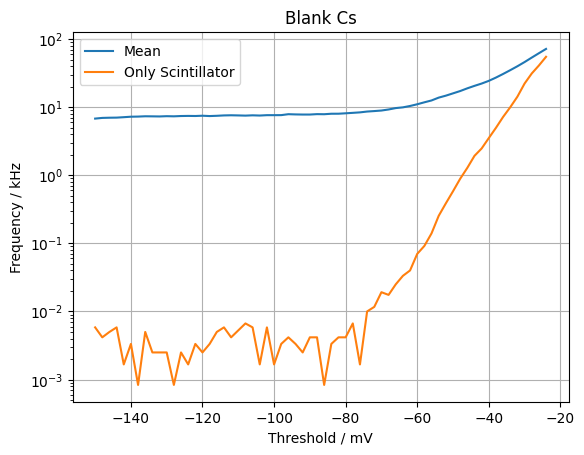

In [13]:
# Checking if all the trials are good and generating the mean result

plt.title('Blank Cs')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')

# Getting and scatterting the mean measurements
mean_df_nCs = pd.concat(df_nCs).groupby(level=0).mean()

plt.semilogy(mean_df_nCs['Threshold'], mean_df_nCs['Frequency'], label=f'Mean')

# Plotting the calibration measurements
plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/New_Graphs/Blank Cs.png', dpi=300, bbox_inches='tight')

plt.show()


In [10]:
#Threshold -70
c = mean_df_nCs['Threshold'][23]
a = mean_df_nCs['Frequency'][23]
b = df_cal['Frequency - With Scintillator'][23]
print(a , b , f'SNR is {round(a/b, 0)}')

8.925556666666667 0.0191667 SNR is 466.0
